# Regression Model Evaluation

## Imports

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Dataset loading

In [90]:
data = fetch_california_housing()

# Splitting dataset into features and labels
X = data.data
y = data.target

## Splitting of data into train and test

In [91]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

## Model and prediction

In [92]:
model = LinearRegression()
model.fit(XTrain, yTrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [93]:
cols = data.feature_names
coeffs = model.coef_

In [94]:
import pandas as pd

val = pd.DataFrame({
    'cols': cols,
    'coeffs': coeffs
})

val = val.sort_values('coeffs', ascending=False)

In [95]:
yPred = model.predict(XTest)

## Feature importance

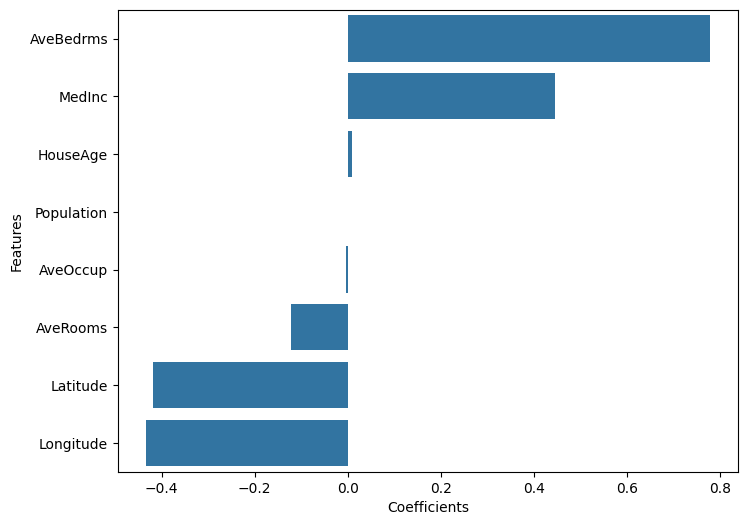

In [96]:
plt.figure(figsize=(8,6))
sns.barplot(data=val, x = "coeffs", y="cols")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

## Evaluation

In [97]:
# Regression metrics
mae = mean_absolute_error(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)
r2 = r2_score(yTest, yPred)

print(f'Predicted values: {yPred[:5]}')
print(f'Actual values: {yTest[:5]}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

Predicted values: [0.72604907 1.76743383 2.71092161 2.83514727 2.60695807]
Actual values: [0.477   0.458   5.00001 2.186   2.78   ]
MAE: 0.5272474538306168
MSE: 0.5305677824766757
RMSE: 0.7284008391515455
R2: 0.595770232606166


## Visualize

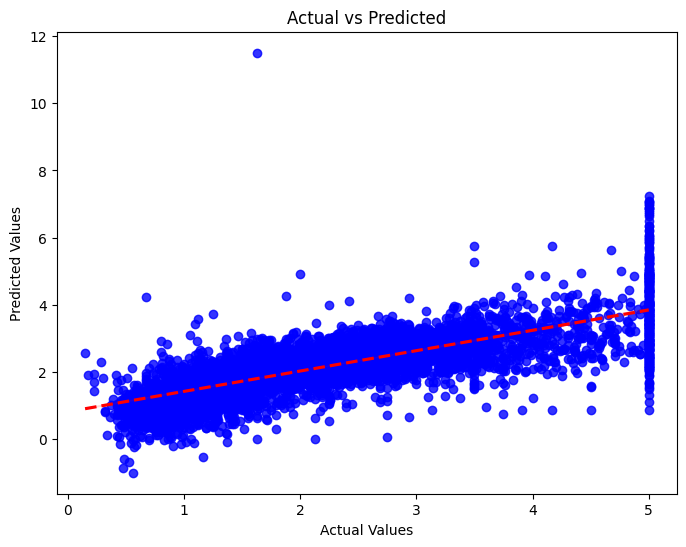

In [98]:
plt.figure(figsize=(8,6))
sns.regplot(x = yTest, y = yPred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red', 'linestyle': '--'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# Classification Model Evaluation

## Importing libs

In [99]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Dataset load

In [100]:
data = load_breast_cancer()

X = data.data
y = data.target

In [101]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

## Prediction

In [102]:
model = LogisticRegression(max_iter=500)

model.fit(XTrain, yTrain)

j:\ML\BDSET\ML-DL-Journey\bdsetEnv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [103]:
yPred = model.predict(XTest)

## Evaluation

In [104]:
acc = accuracy_score(yTest, yPred)
prec = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
cfm = confusion_matrix(yTest, yPred)

print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {recall}")
print(f"F-1 Score: {f1}")
print(f"Classification Matrix:\n{cfm}")

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F-1 Score: 0.9655172413793104
Classification Matrix:
[[39  4]
 [ 1 70]]


## ROC-AUC Curve

In [114]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = model.predict_proba(XTest)[:, 1] 

roc_auc = roc_auc_score(yTest, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9633


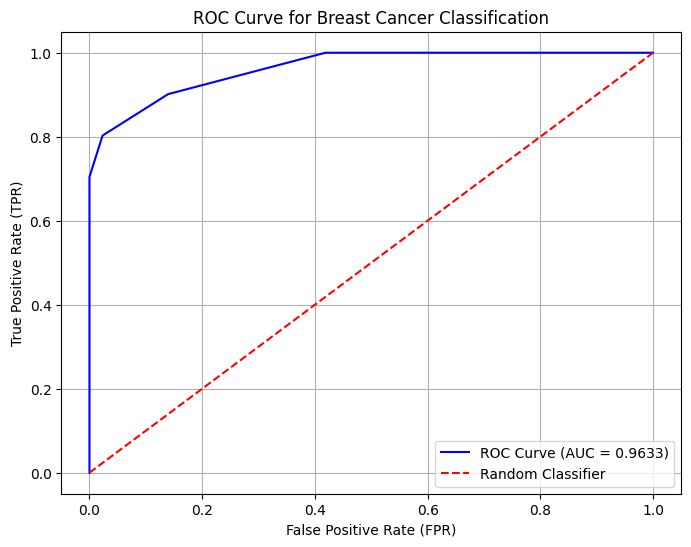

In [ ]:
fpr, tpr, thresholds = roc_curve(yTest, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Visualization

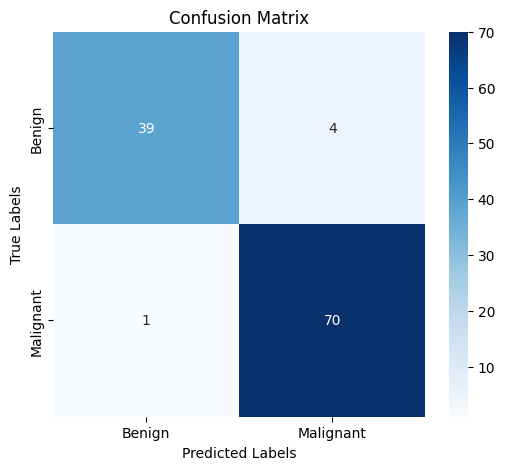

In [105]:
plt.figure(figsize=(6, 5))
sns.heatmap(cfm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Parameter tuning

In [106]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [107]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [108]:
# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [109]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [110]:
depth_values = range(1, 21)
validation_accuracies = []

for depth in depth_values:
    # Initialize the Random Forest model
    model = RandomForestClassifier(max_depth=depth, random_state=42)

    # Train the model on the training set
    model.fit(X_train_scaled, y_train)

    # Evaluate the model on the validation set
    y_val_pred = model.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(val_accuracy)


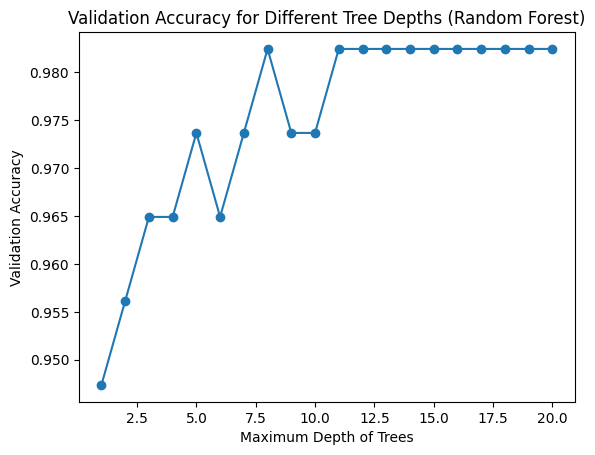

Best tree depth based on validation set: 8


In [111]:
# Plot validation accuracy for different max_depth values
plt.plot(depth_values, validation_accuracies, marker='o')
plt.xlabel('Maximum Depth of Trees')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Tree Depths (Random Forest)')
plt.show()

# Choose the best max_depth value based on validation set
best_depth = depth_values[validation_accuracies.index(max(validation_accuracies))]
print(f"Best tree depth based on validation set: {best_depth}")


In [112]:
# Train the model with the best max_depth on the full training set
best_model = RandomForestClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [113]:
# Final evaluation on the test set
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Final Test Accuracy with max_depth={best_depth}: {test_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Final Test Accuracy with max_depth=8: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.95      1.00      0.97        76

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

